In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [24]:
data = pd.read_excel('eigth_boy.xls')
data.sample(5)

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
151,160,56,2477,8.7,165,8.0
485,163,55,2376,9.6,168,6.5
556,166,40,2300,8.5,168,9.2
608,174,70,3010,8.9,180,8.7
182,160,56,1859,7.7,169,12.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   身高      730 non-null    int64  
 1   体重      730 non-null    int64  
 2   肺活量     730 non-null    int64  
 3   50米跑    730 non-null    float64
 4   立定跳远    730 non-null    int64  
 5   坐位体前屈   730 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 34.3 KB


In [3]:
data.describe()

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,163.489041,55.826027,2770.354795,8.724384,179.065753,8.890685
std,7.061207,7.819369,665.303138,0.725743,17.559339,2.102763
min,106.000000,39.000000,1506.000000,7.200000,65.000000,2.000000
25%,159.000000,51.000000,2357.000000,8.100000,169.250000,7.800000
50%,163.000000,56.000000,2598.000000,8.700000,178.000000,8.700000
75%,169.000000,61.000000,3012.000000,9.300000,190.000000,9.800000
max,199.000000,73.000000,6156.000000,10.100000,230.000000,15.300000


In [8]:
# 支持显示中文
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

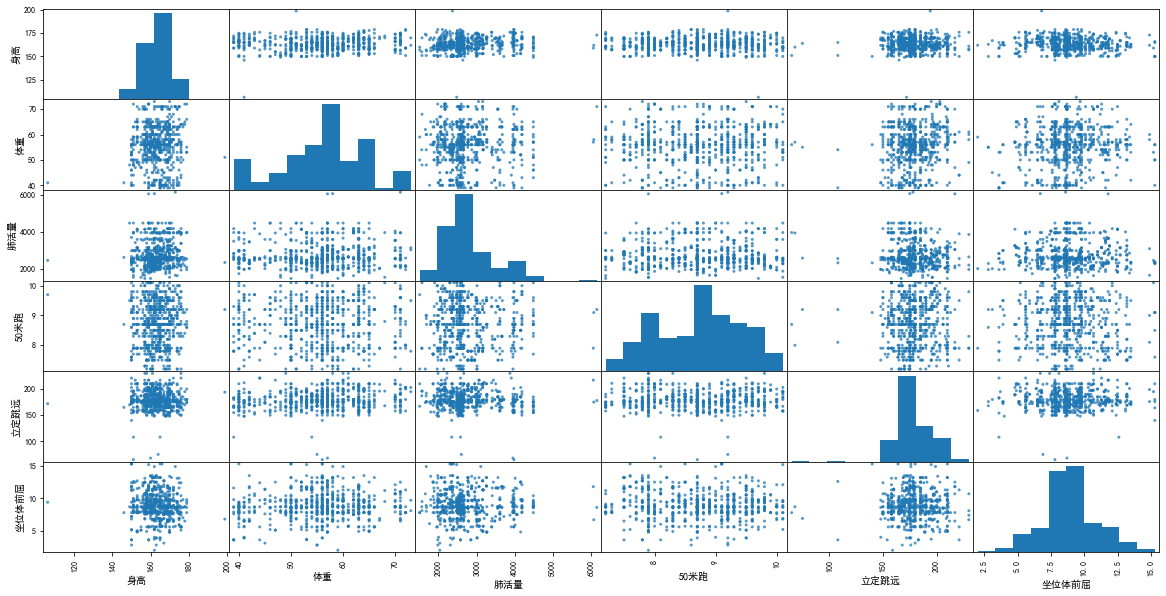

In [9]:
pd.plotting.scatter_matrix(data, figsize=(20,10), alpha=0.75)
plt.show()

### 正态分布检验

In [13]:
def my_jbtext(x,a=0.05):
    col_name = x.columns
    col_cnt = x.shape[1]
    h_mat = np.zeros(col_cnt)
    p_mat = np.zeros(col_cnt)
    for i in range(col_cnt):
        p_val = stats.jarque_bera(data[col_name[i]])[1]
        p_mat[i] = p_val
        if p_val >= a:
            h_mat[i] = 0  # 通过原假设
        else:
            h_mat[i] = 1  # 拒绝原假设
#     print(h_mat)
#     print(p_mat)
    df = pd.DataFrame([p_mat,h_mat], columns=col_name, index=['p_value','H'])
    return df

In [25]:
df = my_jbtext(data,0.01)
df

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
p_value,0.0,0.008415,0.0,0.000004,0.0,0.000548
H,1.0,1.000000,1.0,1.000000,1.0,1.000000


In [19]:
x = stats.norm.rvs(2,3,730)

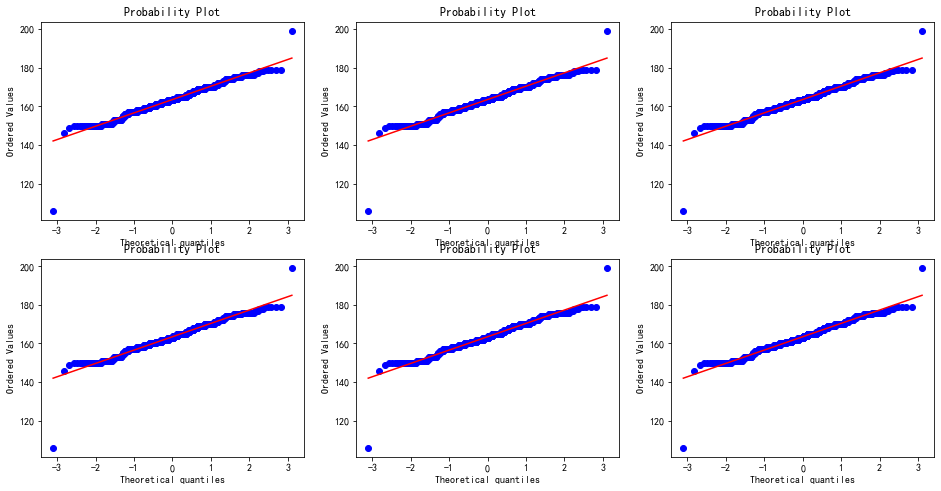

In [32]:
plt.figure(figsize=(16,8))

for j in range(1,7):
    plt.subplot(2,3,j)
    stats.probplot(data['身高'], dist="norm", plot=plt)
plt.show()

### 斯皮尔曼相关系数

In [33]:
data.corr(method='spearman')

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
身高,1.000000,0.034897,0.110435,0.021502,-0.066544,-0.107546
体重,0.034897,1.000000,0.060312,0.019496,0.119964,0.060343
肺活量,0.110435,0.060312,1.000000,-0.027296,-0.045852,-0.034276
50米跑,0.021502,0.019496,-0.027296,1.000000,0.030127,-0.047279
立定跳远,-0.066544,0.119964,-0.045852,0.030127,1.000000,0.005488
坐位体前屈,-0.107546,0.060343,-0.034276,-0.047279,0.005488,1.000000


In [34]:
# 自定义求解p值矩阵的函数
def my_pvalue_spearman(x):
    col = x.shape[1]
    col_name = x.columns.values
    p_val = []
    for i in range(col):
        for j in range(col):
            p_val.append(stats.spearmanr(x[col_name[i]], x[col_name[j]])[1])
    p_val = pd.DataFrame(np.array(p_val).reshape(col, col), columns=col_name, index=col_name)
    p_val.to_csv('p_val_spearman.csv')  # 此处实则为多此一举，目的是借助带有excel格式的数据使得输出更美观
    p_val = pd.read_csv('p_val_spearman.csv', index_col=0)
    return p_val

In [35]:
sp_result = my_pvalue_spearman(data)
sp_result

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
身高,0.000000,0.346426,0.002810,0.561908,0.072364,0.003624
体重,0.346426,0.000000,0.103478,0.598950,0.001165,0.103296
肺活量,0.002810,0.103478,0.000000,0.461503,0.215942,0.355080
50米跑,0.561908,0.598950,0.461503,0.000000,0.416351,0.201975
立定跳远,0.072364,0.001165,0.215942,0.416351,0.000000,0.882314
坐位体前屈,0.003624,0.103296,0.355080,0.201975,0.882314,0.000000


In [36]:
def append_sign(x):
    temp = str(round(x,3))
    if x < 0.01:
        return temp + '**'
    elif 0.01 <= x < 0.05:
        return temp + '*'
    else:
        return temp

In [37]:
row = sp_result.shape[1]
sp_signed = sp_result.copy()
for r in range(row):
    sp_signed.iloc[:,r] = sp_result.iloc[:,r].apply(append_sign)
    
sp_signed

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
身高,0.0**,0.346,0.003**,0.562,0.072,0.004**
体重,0.346,0.0**,0.103,0.599,0.001**,0.103
肺活量,0.003**,0.103,0.0**,0.462,0.216,0.355
50米跑,0.562,0.599,0.462,0.0**,0.416,0.202
立定跳远,0.072,0.001**,0.216,0.416,0.0**,0.882
坐位体前屈,0.004**,0.103,0.355,0.202,0.882,0.0**
